# CNN Basic Assignment #2

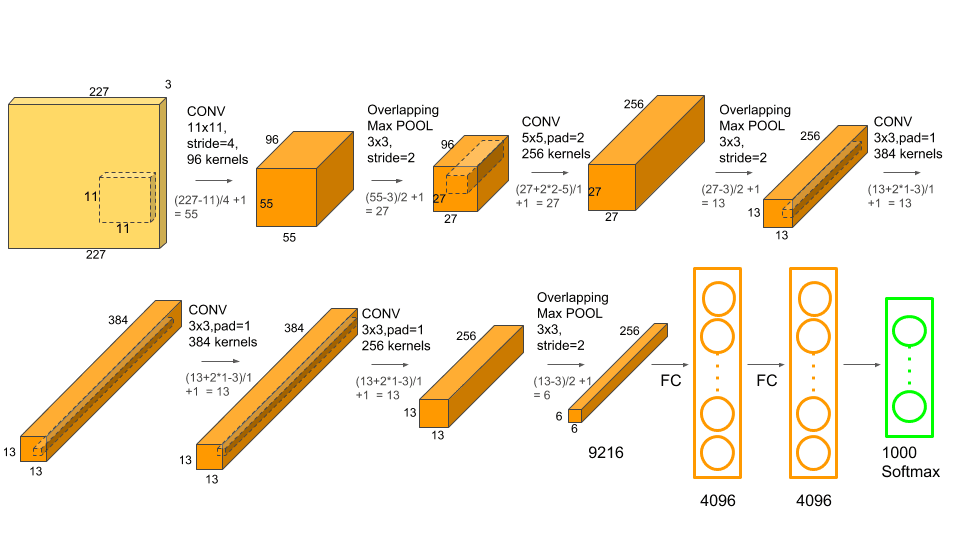

해당 모델은 5개의 Convolution layer와 3개의 Fully Connected layer를 가지고 있으며 활성화 함수로 ReLU함수를 사용했다. 이로 보아 해당 모델은 **Alexnet**임을 알 수 있다.

코드의 layer를 요약하면 아래와 같다.

$\text{Input layer} \rightarrow \text{Conv2d(1)} \rightarrow \text{MaxPool2d(1)} \rightarrow \text{BatchNorm2d(1)} \rightarrow \text{Conv2d(2)} \rightarrow \text{MaxPool2d(2)} \rightarrow \text{BatchNorm2d(2)} \rightarrow \text{Conv2d(3)} \rightarrow \text{Conv2d(4)} \rightarrow \text{Conv2d(5)} \rightarrow \text{MaxPool2d(3)} \rightarrow \text{Dropout(1)} \rightarrow \text{FC layer(1)} \rightarrow \text{Dropout(2)} \rightarrow \text{FC layer(2)} \rightarrow \text{Output layer(3)}$

정리하면 AlexNet 모델은  
- **총 5번의 Conv2d layer,**  
- **3번의 Fully Connected layer,**  
- **3번의 Max Pooling layer,**  
- **2번 Batch Normalization,**  
- **2번의 Dropout을 포함한다.**

컬러 이미지를 학습할 수 있도록 채널의 수는 3개이며, 5번의 Conv2d layer 중 첫번째는 비교적 큰 11$\times$11 필터와 stride = 4를 가진다. 이는 파라미터 수가 많기 때문에 필터와 stride를 크게하여 피처맵의 사이즈를 줄이기 위함으로 볼 수 있다. 두번째 layer는 5$\times$5 필터 사이즈와 stride = 1, 세번째부터 다섯번째 layer는 3$\times$3 필터 사이즈와 stride = 1을 가진다. 3번의 MaxPooling layer는 모두 kernel size = 3, stride = 2 크기의 layer로 구성된다.

- Alexnet의 특징
 1. **Batch Normalization**  
  $\rightarrow$ 학습 속도와 Local Optimum 문제의 개선
 2. **ReLU 활성화 함수 사용**  
  $\rightarrow$ 학습 속도 개선, 연산 비용 감소
 3. **Dropout**  
  $\rightarrow$ 0.5 비율을 설정하여 과적합 방지
 4. **Overlapping Max Pooling**  
  $\rightarrow$ 3$\times$3 filter size에 stride=2이므로 한줄씩 겹친다고 볼 수 있음.

이외에도 data augmentation, 2개의 GPU 사용 등의 특징이 있으나 해당 코드에는 나타나지 않으므로 생략함.

## Pytorch

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):

    def __init__(self, n_classes = 1000):
        super(Model, self).__init__()
        self.Conv_1 = nn.Sequential(
          nn.Conv2d(in_channels = 3, out_channels = 96, kernel_size = 11, stride = 4, padding = 0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2),
          nn.BatchNorm2d(96))
        self.Conv_2 = nn.Sequential(
          nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, stride = 1, padding = 2),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2),
          nn.BatchNorm2d(256))
        self.Conv_3 = nn.Sequential(
          nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU())
        self.Conv_4 = nn.Sequential(
          nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU())
        self.Conv_5 = nn.Sequential(
          nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.FC1 = nn.Sequential(
          nn.Flatten(),
          nn.Dropout(0.5),
          nn.Linear(9216, 4096),
          nn.ReLU()
        )
        self.FC2 = nn.Sequential(
          nn.Dropout(0.5),
          nn.Linear(4096, 4096),
          nn.ReLU()
        )
        self.Output_layer = nn.Sequential(
          nn.Linear(4096, n_classes)
        )

    def forward(self, x):
        out = self.Conv_1(x)
        out = self.Conv_2(out)
        out = self.Conv_3(out)
        out = self.Conv_4(out)
        out = self.Conv_5(out)
        out = self.FC1(out)
        out = self.FC2(out)
        out = self.Output_layer(out)
        return F.log_softmax(out)

In [ ]:
from torchsummary import summary as summary_
print(summary_(Model(),(3,227,227),batch_size=1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 96, 55, 55]          34,944
              ReLU-2            [1, 96, 55, 55]               0
         MaxPool2d-3            [1, 96, 27, 27]               0
       BatchNorm2d-4            [1, 96, 27, 27]             192
            Conv2d-5           [1, 256, 27, 27]         614,656
              ReLU-6           [1, 256, 27, 27]               0
         MaxPool2d-7           [1, 256, 13, 13]               0
       BatchNorm2d-8           [1, 256, 13, 13]             512
            Conv2d-9           [1, 384, 13, 13]         885,120
             ReLU-10           [1, 384, 13, 13]               0
           Conv2d-11           [1, 384, 13, 13]       1,327,488
             ReLU-12           [1, 384, 13, 13]               0
           Conv2d-13           [1, 256, 13, 13]         884,992
             ReLU-14           [1, 256,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
!pip install ptflops
from ptflops import get_model_complexity_info

macs, params = get_model_complexity_info(Model(), (3, 227, 227), as_strings=True,
                                          print_per_layer_stat=True, verbose=True)
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

  Created wheel for ptflops: filename=ptflops-0.6.6-py3-none-any.whl size=8903 sha256=3aacc9cf01e498102445f1129fedb132ee79a5979c164de1ffc17d0fe6b24311
  Stored in directory: /root/.cache/pip/wheels/eb/7c/e5/2332373fcac1b39ba9eb95698ac370da3e14eaba5516e22721
Successfully built ptflops
Model(
  62.379 M, 100.000% Params, 1.137 GMac, 100.000% MACs, 
  (Conv_1): Sequential(
    0.035 M, 0.056% Params, 0.106 GMac, 9.358% MACs, 
    (0): Conv2d(0.035 M, 0.056% Params, 0.106 GMac, 9.294% MACs, 3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(0.0 M, 0.000% Params, 0.0 GMac, 0.026% MACs, )
    (2): MaxPool2d(0.0 M, 0.000% Params, 0.0 GMac, 0.026% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(0.0 M, 0.000% Params, 0.0 GMac, 0.012% MACs, 96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv_2): Sequential(
    0.615 M, 0.986% Params, 0.449 GMac, 39.439% MACs, 
    (0): Conv2d(0.615 M, 0.985% Params, 0.448 GMac, 39.39

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
!pip install thop
from thop import profile
input = torch.randn(1, 3, 227, 227)
flops, params = profile(Model(), inputs=(input, ))
print(flops, params)

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_bn() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.flatten.Flatten'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class '__main__.Model'>. Treat it as zero Macs and zero Params.
1136132672.0 62379048.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


## Tensorflow (Keras)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

n_classes = 1000
input_shape = (227, 227, 3)

model=Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')) 
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [ ]:
!pip install model-profiler
from model_profiler import model_profiler

profile = model_profiler(model, 1)

print(profile)

| Model Profile                    | Value         | Unit    |
|----------------------------------|---------------|---------|
| Selected GPUs                    | None Detected | GPU IDs |
| No. of FLOPs                     | 0.0227        | BFLOPs  |
| GPU Memory Requirement           | 0.0615        | GB      |
| Model Parameters                 | 62.3798       | Million |
| Memory Required by Model Weights | 237.9599      | MB      |


In [ ]:
!pip3 install keras_flops
from keras_flops import get_flops
flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops}")

FLOPS: 2272507248
